In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
from state_evolution.constants import SEProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.special import erfc

Define a datamodel

In [10]:
d = 1000

In [11]:
protect_robust_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(5, int(d/2)),(0.2, int(d/2))]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(2, int(d/2)),(1, int(d/2))]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
}

protect_robust_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=protect_robust_kwargs,
    name="protect-robust"
)

uniform_defence_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(5, int(d/2)),(0.2, int(d/2))]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(2, int(d/2)),(1, int(d/2))]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
}

uniform_defence_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=uniform_defence_kwargs,
    name="uniform_defence"
)

protect_non_robust_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(5, int(d/2)),(0.2, int(d/2))]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(2, int(d/2))]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, int(d/2)),(1, int(d/2))]),
}

protect_non_robust_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=protect_non_robust_kwargs,
    name="protect-non-robust"
)



Define an experiment

In [12]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=1,
    alphas=np.logspace(-0.2,2,5),
    epsilons=np.array([0.0, 0.1, 0.2, 0.3]),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models = [protect_robust_datamodel, uniform_defence_datamodel, protect_non_robust_datamodel],
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.LogisticFGM,
    se_problem_type=SEProblemType.LogisticFGM,
    gamma_fair_error=0.01,
    name="defence_sweep_fgm"
)
experiment_json = experiment.to_json()

In [13]:
with open("defence_sweep_fgm.json", "w") as f:
    f.write(experiment_json)

In [14]:
venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

INFO:root:The MPI comm size is 5
INFO:root:This process has rank 4
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment defence_sweep_fgm
INFO:root:Starting Experiment defence_sweep_fgm
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 1
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 3
INFO:root:This process has rank 2
  0%|          | 0/120 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Starting task 1
INFO:root:Initializing data model
INFO:root:Starting task 2
INFO:root:Initializing data model
INFO:root:Received the 0th task
INFO:root:Starting task 4
INFO:root:Starting task 3
INFO:root:Initializing data model
INFO:root:Initializing data model


2025-03-04 22:15:28,033 - Rank 0 - INFO - The MPI comm size is 5
2025-03-04 22:15:28,033 - Rank 0 - INFO - This process has rank 0
2025-03-04 22:15:28,033 - Rank 0 - INFO - Starting Master for experiment defence_sweep_fgm
2025-03-04 22:15:28,033 - Rank 0 - INFO - Starting Experiment defence_sweep_fgm
2025-03-04 22:15:28,041 - Rank 0 - INFO - Starting all processes
2025-03-04 22:15:28,041 - Rank 0 - INFO - Sending task 0 to 1
2025-03-04 22:15:28,042 - Rank 0 - INFO - Sending task 1 to 2
2025-03-04 22:15:28,042 - Rank 0 - INFO - Sending task 2 to 3
2025-03-04 22:15:28,042 - Rank 0 - INFO - Sending task 3 to 4
2025-03-04 22:15:28,042 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-03-04 22:15:28,042 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:15:36,298 - Rank 0 - INFO - Received task 3 from 3
2025-03-04 22:15:36,298 - Rank 0 - INFO - Saved Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddfa390>)
2025-03-04 22:15:36,299 - Rank 0 - INFO - Received the 1th task
2025-

INFO:root:Received task 2 from 2
INFO:root:Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddfaa50>)
  2%|▏         | 2/120 [00:08<06:48,  3.47s/it]INFO:root:Received the 2th task
INFO:root:Starting task 6
INFO:root:Initializing data mod

2025-03-04 22:15:36,737 - Rank 0 - INFO - Received task 1 from 1
2025-03-04 22:15:36,737 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddfb650>)
2025-03-04 22:15:36,738 - Rank 0 - INFO - Received the 4th task


INFO:root:Received task 1 from 1
INFO:root:Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddfb650>)
  3%|▎         | 4/120 [00:08<02:41,  1.40s/it]INFO:root:Received the 4th task
INFO:root:Starting task 8
INFO:root:Initializing data mode

2025-03-04 22:15:45,747 - Rank 0 - INFO - Received task 5 from 3
2025-03-04 22:15:45,747 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddfbc10>)
2025-03-04 22:15:45,748 - Rank 0 - INFO - Received the 5th task


INFO:root:Finished State Evolution Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 6 from 2
INFO:root:Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_ag

2025-03-04 22:15:46,324 - Rank 0 - INFO - Received task 6 from 2
2025-03-04 22:15:46,324 - Rank 0 - INFO - Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de08390>)
2025-03-04 22:15:46,326 - Rank 0 - INFO - Received the 6th task


INFO:root:Finished State Evolution Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 8 from 1
INFO:root:Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_again

2025-03-04 22:15:46,791 - Rank 0 - INFO - Received task 8 from 1
2025-03-04 22:15:46,791 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de085d0>)
2025-03-04 22:15:46,794 - Rank 0 - INFO - Received the 7th task


INFO:root:Starting task 11
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 7 from 4
INFO:root:Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.Logist

2025-03-04 22:15:47,278 - Rank 0 - INFO - Received task 7 from 4
2025-03-04 22:15:47,280 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de08b50>)
2025-03-04 22:15:47,283 - Rank 0 - INFO - Received the 8th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:15:54,617 - Rank 0 - INFO - Received task 9 from 3
2025-03-04 22:15:54,617 - Rank 0 - INFO - Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de090d0>)
2025-03-04 22:15:54,628 - Rank 0 - INFO - Received the 9th task


INFO:root:Starting task 13
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 10 from 2
INFO:root:Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.Log

2025-03-04 22:15:55,058 - Rank 0 - INFO - Received task 10 from 2
2025-03-04 22:15:55,058 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de09690>)
2025-03-04 22:15:55,059 - Rank 0 - INFO - Received the 10th task


INFO:root:Finished State Evolution Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 11 from 1
INFO:root:Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_ag

2025-03-04 22:15:55,685 - Rank 0 - INFO - Received task 11 from 1
2025-03-04 22:15:55,685 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16dd71c50>)
2025-03-04 22:15:55,688 - Rank 0 - INFO - Received the 11th task


INFO:root:Finished State Evolution Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 12 from 4
INFO:root:Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test

2025-03-04 22:15:56,494 - Rank 0 - INFO - Received task 12 from 4
2025-03-04 22:15:56,494 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddea150>)
2025-03-04 22:15:56,496 - Rank 0 - INFO - Received the 12th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:16:06,707 - Rank 0 - INFO - Received task 13 from 3
2025-03-04 22:16:06,737 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de0a550>)
2025-03-04 22:16:06,738 - Rank 0 - INFO - Received the 13th task


INFO:root:Finished State Evolution Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 14 from 2
INFO:root:Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_agains

2025-03-04 22:16:07,290 - Rank 0 - INFO - Received task 14 from 2
2025-03-04 22:16:07,290 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddfab50>)
2025-03-04 22:16:07,291 - Rank 0 - INFO - Received the 14th task


INFO:root:Finished State Evolution Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 15 from 1
INFO:root:Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_aga

2025-03-04 22:16:08,288 - Rank 0 - INFO - Received task 15 from 1
2025-03-04 22:16:08,289 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de0b090>)
2025-03-04 22:16:08,290 - Rank 0 - INFO - Received the 15th task


INFO:root:Finished State Evolution Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 16 from 4
INFO:root:Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against

2025-03-04 22:16:10,008 - Rank 0 - INFO - Received task 16 from 4
2025-03-04 22:16:10,008 - Rank 0 - INFO - Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de0b2d0>)
2025-03-04 22:16:10,009 - Rank 0 - INFO - Received the 16th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. .

2025-03-04 22:16:16,887 - Rank 0 - INFO - Received task 17 from 3
2025-03-04 22:16:16,887 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de0b690>)
2025-03-04 22:16:16,888 - Rank 0 - INFO - Received the 17th task


INFO:root:Finished State Evolution Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 18 from 2
INFO:root:Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_aga

2025-03-04 22:16:17,281 - Rank 0 - INFO - Received task 18 from 2
2025-03-04 22:16:17,281 - Rank 0 - INFO - Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de0be90>)
2025-03-04 22:16:17,282 - Rank 0 - INFO - Received the 18th task


INFO:root:Finished State Evolution Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 19 from 1
INFO:root:Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against

2025-03-04 22:16:19,391 - Rank 0 - INFO - Received task 19 from 1
2025-03-04 22:16:19,391 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de0a9d0>)
2025-03-04 22:16:19,392 - Rank 0 - INFO - Received the 19th task


INFO:root:Finished State Evolution Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 20 from 4
INFO:root:Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_agains

2025-03-04 22:16:20,716 - Rank 0 - INFO - Received task 20 from 4
2025-03-04 22:16:20,716 - Rank 0 - INFO - Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1c710>)
2025-03-04 22:16:20,717 - Rank 0 - INFO - Received the 20th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:16:25,838 - Rank 0 - INFO - Received task 21 from 3
2025-03-04 22:16:25,838 - Rank 0 - INFO - Saved Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1c990>)
2025-03-04 22:16:25,840 - Rank 0 - INFO - Received the 21th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:16:27,675 - Rank 0 - INFO - Received task 24 from 4
2025-03-04 22:16:27,676 - Rank 0 - INFO - Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1d090>)
2025-03-04 22:16:27,677 - Rank 0 - INFO - Received the 22th task


INFO:root:Finished State Evolution Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 22 from 2
INFO:root:Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against

2025-03-04 22:16:28,891 - Rank 0 - INFO - Received task 22 from 2
2025-03-04 22:16:28,891 - Rank 0 - INFO - Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1d2d0>)
2025-03-04 22:16:28,893 - Rank 0 - INFO - Received the 23th task


INFO:root:Finished State Evolution Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 23 from 1
INFO:root:Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_agains

2025-03-04 22:16:29,954 - Rank 0 - INFO - Received task 23 from 1
2025-03-04 22:16:29,954 - Rank 0 - INFO - Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1d5d0>)
2025-03-04 22:16:29,955 - Rank 0 - INFO - Received the 24th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:16:34,103 - Rank 0 - INFO - Received task 25 from 3
2025-03-04 22:16:34,103 - Rank 0 - INFO - Saved Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1da10>)
2025-03-04 22:16:34,105 - Rank 0 - INFO - Received the 25th task


INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.33333333 0.         ... 0.         0.         0.        ]
 [0.         0.         1.3333333

2025-03-04 22:16:36,771 - Rank 0 - INFO - Received task 26 from 4
2025-03-04 22:16:36,771 - Rank 0 - INFO - Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1de90>)
2025-03-04 22:16:36,772 - Rank 0 - INFO - Received the 26th task


INFO:root:Finished State Evolution Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 27 from 2
INFO:root:Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_a

2025-03-04 22:16:37,991 - Rank 0 - INFO - Received task 27 from 2
2025-03-04 22:16:37,991 - Rank 0 - INFO - Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1e410>)
2025-03-04 22:16:37,993 - Rank 0 - INFO - Received the 27th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:16:46,039 - Rank 0 - INFO - Received task 31 from 2
2025-03-04 22:16:46,039 - Rank 0 - INFO - Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1e790>)
2025-03-04 22:16:46,040 - Rank 0 - INFO - Received the 28th task
2025-03

INFO:root:Finished State Evolution Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 28 from 1
INFO:root:Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_again

2025-03-04 22:16:48,806 - Rank 0 - INFO - Received task 29 from 3
2025-03-04 22:16:48,807 - Rank 0 - INFO - Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1f250>)
2025-03-04 22:16:48,808 - Rank 0 - INFO - Received the 30th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1

2025-03-04 22:16:54,537 - Rank 0 - INFO - Received task 30 from 4
2025-03-04 22:16:54,537 - Rank 0 - INFO - Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1f810>)
2025-03-04 22:16:54,538 - Rank 0 - INFO - Received the 31th task


INFO:root:Finished State Evolution Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 34 from 3
INFO:root:Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_again

2025-03-04 22:16:56,920 - Rank 0 - INFO - Received task 34 from 3
2025-03-04 22:16:56,920 - Rank 0 - INFO - Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1f150>)
2025-03-04 22:16:56,921 - Rank 0 - INFO - Received the 32th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:17:00,443 - Rank 0 - INFO - Received task 32 from 2
2025-03-04 22:17:00,443 - Rank 0 - INFO - Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x15aececd0>)
2025-03-04 22:17:00,445 - Rank 0 - INFO - Received the 33th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:17:03,297 - Rank 0 - INFO - Received task 35 from 4
2025-03-04 22:17:03,297 - Rank 0 - INFO - Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1c710>)
2025-03-04 22:17:03,298 - Rank 0 - INFO - Received the 34th task


INFO:root:Finished State Evolution Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 33 from 1
INFO:root:Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_a

2025-03-04 22:17:04,404 - Rank 0 - INFO - Received task 33 from 1
2025-03-04 22:17:04,404 - Rank 0 - INFO - Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de34c50>)
2025-03-04 22:17:04,405 - Rank 0 - INFO - Received the 35th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:17:09,981 - Rank 0 - INFO - Received task 36 from 3
2025-03-04 22:17:09,981 - Rank 0 - INFO - Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de35290>)
2025-03-04 22:17:09,982 - Rank 0 - INFO - Received the 36th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:17:19,091 - Rank 0 - INFO - Received task 37 from 2
2025-03-04 22:17:19,091 - Rank 0 - INFO - Saved Task(id=37, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de35510>)
2025-03-04 22:17:19,092 - Rank 0 - INFO - Received the 37th task


INFO:root:Finished State Evolution Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 38 from 4
INFO:root:Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_agai

2025-03-04 22:17:22,028 - Rank 0 - INFO - Received task 38 from 4
2025-03-04 22:17:22,028 - Rank 0 - INFO - Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de35a50>)
2025-03-04 22:17:22,029 - Rank 0 - INFO - Received the 38th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:17:23,444 - Rank 0 - INFO - Received task 39 from 1
2025-03-04 22:17:23,444 - Rank 0 - INFO - Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de35f50>)
2025-03-04 22:17:23,446 - Rank 0 - INFO - Received the 39th task


INFO:root:iter_nb: 1000, err: 2.4379313686040405e-05
INFO:root:error: 2.4379313686040405e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ

2025-03-04 22:17:27,600 - Rank 0 - INFO - Received task 40 from 3
2025-03-04 22:17:27,600 - Rank 0 - INFO - Saved Task(id=40, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de36510>)
2025-03-04 22:17:27,601 - Rank 0 - INFO - Received the 40th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:17:33,027 - Rank 0 - INFO - Received task 43 from 1
2025-03-04 22:17:33,027 - Rank 0 - INFO - Saved Task(id=43, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de367d0>)
2025-03-04 22:17:33,028 - Rank 0 - INFO - Received the 41th task


INFO:root:iter_nb: 500, err: 0.009939695653400804
INFO:root:error: 0.009939695653400804
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Finished State Evolution Task(id=44, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.0

2025-03-04 22:17:36,127 - Rank 0 - INFO - Received task 44 from 3
2025-03-04 22:17:36,128 - Rank 0 - INFO - Saved Task(id=44, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de36e90>)
2025-03-04 22:17:36,129 - Rank 0 - INFO - Received the 42th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:17:40,884 - Rank 0 - INFO - Received task 46 from 3
2025-03-04 22:17:40,884 - Rank 0 - INFO - Saved Task(id=46, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1f290>)
2025-03-04 22:17:40,885 - Rank 0 - INFO - Received the 43th task


INFO:root:Finished State Evolution Task(id=41, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 41 from 2
INFO:root:Saved Task(id=41, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_agai

2025-03-04 22:17:41,466 - Rank 0 - INFO - Received task 41 from 2
2025-03-04 22:17:41,467 - Rank 0 - INFO - Saved Task(id=41, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de37610>)
2025-03-04 22:17:41,468 - Rank 0 - INFO - Received the 44th task


INFO:root:iter_nb: 1000, err: 4.0252399259088634e-05
INFO:root:error: 4.0252399259088634e-05
INFO:root:Finished State Evolution Task(id=45, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)


2025-03-04 22:17:45,050 - Rank 0 - INFO - Received task 45 from 1
2025-03-04 22:17:45,050 - Rank 0 - INFO - Saved Task(id=45, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de37910>)
2025-03-04 22:17:45,051 - Rank 0 - INFO - Received the 45th task


INFO:root:Received task 45 from 1
INFO:root:Saved Task(id=45, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de37910>)
 38%|███▊      | 45/120 [02:17<04:02,  3.24s/it]INFO:root:Received the 45th task
INFO:root:Starting task 49
INFO:root:Initializing d

2025-03-04 22:17:47,891 - Rank 0 - INFO - Received task 42 from 4
2025-03-04 22:17:47,891 - Rank 0 - INFO - Saved Task(id=42, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de1fd10>)
2025-03-04 22:17:47,892 - Rank 0 - INFO - Received the 46th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:17:50,693 - Rank 0 - INFO - Received task 47 from 3
2025-03-04 22:17:50,693 - Rank 0 - INFO - Saved Task(id=47, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1545d7050>)
2025-03-04 22:17:50,695 - Rank 0 - INFO - Received the 47th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:17:52,651 - Rank 0 - INFO - Received task 48 from 2
2025-03-04 22:17:52,651 - Rank 0 - INFO - Saved Task(id=48, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de08890>)
2025-03-04 22:17:52,652 - Rank 0 - INFO - Received the 48th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:18:07,149 - Rank 0 - INFO - Received task 52 from 2
2025-03-04 22:18:07,149 - Rank 0 - INFO - Saved Task(id=52, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16dfa09d0>)
2025-03-04 22:18:07,150 - Rank 0 - INFO - Received the 49th task


INFO:root:iter_nb: 2000, err: 0.0018996101457560144
INFO:root:error: 0.0018996101457560144
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: 

2025-03-04 22:18:17,654 - Rank 0 - INFO - Received task 49 from 1
2025-03-04 22:18:17,654 - Rank 0 - INFO - Saved Task(id=49, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de090d0>)
2025-03-04 22:18:17,656 - Rank 0 - INFO - Received the 50th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:18:19,702 - Rank 0 - INFO - Received task 50 from 4
2025-03-04 22:18:19,702 - Rank 0 - INFO - Saved Task(id=50, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddf93d0>)
2025-03-04 22:18:19,703 - Rank 0 - INFO - Received the 51th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:18:21,669 - Rank 0 - INFO - Received task 51 from 3
2025-03-04 22:18:21,669 - Rank 0 - INFO - Saved Task(id=51, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16dfa09d0>)
2025-03-04 22:18:21,671 - Rank 0 - INFO - Received the 52th task


INFO:root:Finished State Evolution Task(id=53, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 53 from 2
INFO:root:Saved Task(id=53, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=

2025-03-04 22:18:23,961 - Rank 0 - INFO - Received task 53 from 2
2025-03-04 22:18:23,961 - Rank 0 - INFO - Saved Task(id=53, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddf9b50>)
2025-03-04 22:18:23,962 - Rank 0 - INFO - Received the 53th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:18:28,398 - Rank 0 - INFO - Received task 55 from 4
2025-03-04 22:18:28,398 - Rank 0 - INFO - Saved Task(id=55, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddea050>)
2025-03-04 22:18:28,400 - Rank 0 - INFO - Received the 54th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:18:31,783 - Rank 0 - INFO - Received task 56 from 3
2025-03-04 22:18:31,783 - Rank 0 - INFO - Saved Task(id=56, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16dfa2410>)
2025-03-04 22:18:31,784 - Rank 0 - INFO - Received the 55th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:18:34,574 - Rank 0 - INFO - Received task 57 from 2
2025-03-04 22:18:34,583 - Rank 0 - INFO - Saved Task(id=57, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de08b50>)
2025-03-04 22:18:34,584 - Rank 0 - INFO - Received the 56th task


INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=58, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 58 from 4
INFO:root:Saved Task(id=58, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, 

2025-03-04 22:18:35,593 - Rank 0 - INFO - Received task 58 from 4
2025-03-04 22:18:35,593 - Rank 0 - INFO - Saved Task(id=58, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16de0ab10>)
2025-03-04 22:18:35,594 - Rank 0 - INFO - Received the 57th task


INFO:root:iter_nb: 1000, err: 3.103572970530877e-05
INFO:root:error: 3.103572970530877e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: 

2025-03-04 22:18:40,446 - Rank 0 - INFO - Received task 59 from 3
2025-03-04 22:18:40,447 - Rank 0 - INFO - Saved Task(id=59, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16ddea050>)
2025-03-04 22:18:40,448 - Rank 0 - INFO - Received the 58th task


INFO:root:Finished State Evolution Task(id=54, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 54 from 1
INFO:root:Saved Task(id=54, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], l

2025-03-04 22:18:42,327 - Rank 0 - INFO - Received task 54 from 1
2025-03-04 22:18:42,327 - Rank 0 - INFO - Saved Task(id=54, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16dfa3210>)
2025-03-04 22:18:42,331 - Rank 0 - INFO - Received the 59th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:18:48,656 - Rank 0 - INFO - Received task 60 from 2
2025-03-04 22:18:48,656 - Rank 0 - INFO - Saved Task(id=60, task_type=<TaskType.SE: 1>, erm_problem_type=None, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16dfa3590>)
2025-03-04 22:18:48,658 - Rank 0 - INFO - Received the 60th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:19:06,228 - Rank 0 - INFO - Received task 61 from 4
2025-03-04 22:19:06,228 - Rank 0 - INFO - Saved Task(id=61, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddfba50>)
2025-03-04 22:19:06,229 - Rank 0 - INFO - Received the 61th

INFO:root:Finished ERM Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 62 from 3
INFO:root:Saved Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.63

2025-03-04 22:19:12,487 - Rank 0 - INFO - Received task 62 from 3
2025-03-04 22:19:12,487 - Rank 0 - INFO - Saved Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0a850>)
2025-03-04 22:19:12,489 - Rank 0 - INFO - Received the 62t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Finished ERM Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1

2025-03-04 22:19:14,648 - Rank 0 - INFO - Received task 63 from 1
2025-03-04 22:19:14,648 - Rank 0 - INFO - Saved Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddfbcd0>)
2025-03-04 22:19:14,649 - Rank 0 - INFO - Received the 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:19:25,663 - Rank 0 - INFO - Received task 64 from 2
2025-03-04 22:19:25,663 - Rank 0 - INFO - Saved Task(id=64, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de34c50>)
2025-03-04 22:19:25,664 - Rank 0 - INFO - Received the 64th

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:19:43,367 - Rank 0 - INFO - Received task 65 from 4
2025-03-04 22:19:43,367 - Rank 0 - INFO - Saved Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc0450>)
2025-03-04 22:19:43,368 - Rank 0 - INFO - Received the 65t

INFO:root:Received task 65 from 4
INFO:root:Saved Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc0450>)
 54%|█████▍    | 65/120 [04:15<09:38, 10.52s/it]INFO:root:Received the 65th task
INFO:root:Starting task 69
INFO:root:Init

2025-03-04 22:19:49,151 - Rank 0 - INFO - Received task 66 from 3
2025-03-04 22:19:49,151 - Rank 0 - INFO - Saved Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc0610>)
2025-03-04 22:19:49,156 - Rank 0 - INFO - Received the 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:19:52,373 - Rank 0 - INFO - Received task 67 from 1
2025-03-04 22:19:52,373 - Rank 0 - INFO - Saved Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de08890>)
2025-03-04 22:19:52,374 - Rank 0 - INFO - Received the 67th

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:20:03,812 - Rank 0 - INFO - Received task 68 from 2
2025-03-04 22:20:03,813 - Rank 0 - INFO - Saved Task(id=68, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc0750>)
2025-03-04 22:20:03,814 - Rank 0 - INFO - Received the 68t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:20:17,979 - Rank 0 - INFO - Received task 69 from 4
2025-03-04 22:20:17,979 - Rank 0 - INFO - Saved Task(id=69, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc0390>)
2025-03-04 22:20:17,980 - Rank 0 - INFO - Received the 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:20:28,902 - Rank 0 - INFO - Received task 70 from 3
2025-03-04 22:20:28,902 - Rank 0 - INFO - Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de09390>)
2025-03-04 22:20:28,905 - Rank 0 - INFO - Received the 70th

INFO:root:Received task 70 from 3
INFO:root:Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de09390>)
 58%|█████▊    | 70/120 [05:00<08:42, 10.45s/it]INFO:root:Received the 70th task
INFO:root:Starting task 74
INFO:root:Initi

2025-03-04 22:20:30,040 - Rank 0 - INFO - Received task 71 from 1
2025-03-04 22:20:30,040 - Rank 0 - INFO - Saved Task(id=71, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddf97d0>)
2025-03-04 22:20:30,042 - Rank 0 - INFO - Received the 71t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:20:40,595 - Rank 0 - INFO - Received task 72 from 2
2025-03-04 22:20:40,595 - Rank 0 - INFO - Saved Task(id=72, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfa1b50>)
2025-03-04 22:20:40,596 - Rank 0 - INFO - Received the 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:21:05,289 - Rank 0 - INFO - Received task 73 from 4
2025-03-04 22:21:05,289 - Rank 0 - INFO - Saved Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de09cd0>)
2025-03-04 22:21:05,290 - Rank 0 - INFO - Received the 73th t

INFO:root:Received task 73 from 4
INFO:root:Saved Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de09cd0>)
 61%|██████    | 73/120 [05:37<10:28, 13.38s/it]INFO:root:Received the 73th task
INFO:root:Starting task 77
INFO:root:Initial

2025-03-04 22:21:11,794 - Rank 0 - INFO - Received task 74 from 3
2025-03-04 22:21:11,794 - Rank 0 - INFO - Saved Task(id=74, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de097d0>)
2025-03-04 22:21:11,796 - Rank 0 - INFO - Received the 74th 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:21:16,923 - Rank 0 - INFO - Received task 75 from 1
2025-03-04 22:21:16,923 - Rank 0 - INFO - Saved Task(id=75, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc2350>)
2025-03-04 22:21:16,925 - Rank 0 - INFO - Received the 75

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:21:30,532 - Rank 0 - INFO - Received task 76 from 2
2025-03-04 22:21:30,532 - Rank 0 - INFO - Saved Task(id=76, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0a650>)
2025-03-04 22:21:30,592 - Rank 0 - INFO - Received the 76th t

INFO:root:Received the 76th task
INFO:root:Starting task 80
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_

2025-03-04 22:21:56,161 - Rank 0 - INFO - Received task 77 from 4
2025-03-04 22:21:56,172 - Rank 0 - INFO - Saved Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc2790>)
2025-03-04 22:21:56,174 - Rank 0 - INFO - Received the 77th 

INFO:root:Finished ERM Task(id=78, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 78 from 3
INFO:root:Saved Task(id=78, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.2

2025-03-04 22:21:58,315 - Rank 0 - INFO - Received task 78 from 3
2025-03-04 22:21:58,324 - Rank 0 - INFO - Saved Task(id=78, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0a9d0>)
2025-03-04 22:21:58,325 - Rank 0 - INFO - Received the 78

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:22:11,587 - Rank 0 - INFO - Received task 79 from 1
2025-03-04 22:22:11,587 - Rank 0 - INFO - Saved Task(id=79, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc2e90>)
2025-03-04 22:22:11,589 - Rank 0 - INFO - Received the 79th t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:22:25,406 - Rank 0 - INFO - Received task 80 from 2
2025-03-04 22:22:25,406 - Rank 0 - INFO - Saved Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfa3290>)
2025-03-04 22:22:25,407 - Rank 0 - INFO - Received the 80th 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:22:43,343 - Rank 0 - INFO - Received task 81 from 4
2025-03-04 22:22:43,344 - Rank 0 - INFO - Saved Task(id=81, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc2f50>)
2025-03-04 22:22:43,345 - Rank 0 - INFO - Received the 81

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:22:54,615 - Rank 0 - INFO - Received task 82 from 3
2025-03-04 22:22:54,615 - Rank 0 - INFO - Saved Task(id=82, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0b110>)
2025-03-04 22:22:54,618 - Rank 0 - INFO - Received the 82th t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:23:05,427 - Rank 0 - INFO - Received task 83 from 1
2025-03-04 22:23:05,427 - Rank 0 - INFO - Saved Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddfbc50>)
2025-03-04 22:23:05,428 - Rank 0 - INFO - Received the 83th 

INFO:root:Finished ERM Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 84 from 2
INFO:root:Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.2

2025-03-04 22:23:09,031 - Rank 0 - INFO - Received task 84 from 2
2025-03-04 22:23:09,031 - Rank 0 - INFO - Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=2.23872113856834, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0be90>)
2025-03-04 22:23:09,033 - Rank 0 - INFO - Received the 84

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:23:40,527 - Rank 0 - INFO - Received task 85 from 4
2025-03-04 22:23:40,527 - Rank 0 - INFO - Saved Task(id=85, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x15194fdd0>)
2025-03-04 22:23:40,528 - Rank 0 - INFO - Received the 85th 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:23:54,804 - Rank 0 - INFO - Received task 86 from 3
2025-03-04 22:23:54,804 - Rank 0 - INFO - Saved Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfd8510>)
2025-03-04 22:23:54,805 - Rank 0 - INFO - Received the 86th

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:24:05,724 - Rank 0 - INFO - Received task 88 from 2
2025-03-04 22:24:05,724 - Rank 0 - INFO - Saved Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfa0890>)
2025-03-04 22:24:05,725 - Rank 0 - INFO - Received the 87th 

INFO:root:Finished ERM Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 87 from 1
INFO:root:Saved Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.

2025-03-04 22:24:08,074 - Rank 0 - INFO - Received task 87 from 1
2025-03-04 22:24:08,074 - Rank 0 - INFO - Saved Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfd8b50>)
2025-03-04 22:24:08,076 - Rank 0 - INFO - Received the 8

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:24:41,226 - Rank 0 - INFO - Received task 89 from 4
2025-03-04 22:24:41,226 - Rank 0 - INFO - Saved Task(id=89, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de08f90>)
2025-03-04 22:24:41,227 - Rank 0 - INFO - Received the 89th

INFO:root:Finished ERM Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 91 from 2
INFO:root:Saved Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.9432

2025-03-04 22:24:46,442 - Rank 0 - INFO - Received task 91 from 2
2025-03-04 22:24:46,442 - Rank 0 - INFO - Saved Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de085d0>)
2025-03-04 22:24:46,443 - Rank 0 - INFO - Received the 90th 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Finished ERM Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.

2025-03-04 22:24:48,742 - Rank 0 - INFO - Received task 92 from 1
2025-03-04 22:24:48,742 - Rank 0 - INFO - Saved Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddf9590>)
2025-03-04 22:24:48,743 - Rank 0 - INFO - Received the 91th

INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.6666

2025-03-04 22:24:49,177 - Rank 0 - INFO - Received task 90 from 3
2025-03-04 22:24:49,177 - Rank 0 - INFO - Saved Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc17d0>)
2025-03-04 22:24:49,179 - Rank 0 - INFO - Received the 9

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:25:18,239 - Rank 0 - INFO - Received task 93 from 4
2025-03-04 22:25:18,239 - Rank 0 - INFO - Saved Task(id=93, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfd9010>)
2025-03-04 22:25:18,241 - Rank 0 - INFO - Received the 9

INFO:root:Finished ERM Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 96 from 3
INFO:root:Saved Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.

2025-03-04 22:25:22,627 - Rank 0 - INFO - Received task 96 from 3
2025-03-04 22:25:22,627 - Rank 0 - INFO - Saved Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dd71c50>)
2025-03-04 22:25:22,628 - Rank 0 - INFO - Received the 9

INFO:root:Finished ERM Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 95 from 1
INFO:root:Finished ERM Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alph

2025-03-04 22:25:24,742 - Rank 0 - INFO - Received task 95 from 1
2025-03-04 22:25:24,753 - Rank 0 - INFO - Saved Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddfa110>)
2025-03-04 22:25:24,755 - Rank 0 - INFO - Received the 95th

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Received task 94 from 2
INFO:root:Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult obj

2025-03-04 22:25:25,196 - Rank 0 - INFO - Received task 94 from 2
2025-03-04 22:25:25,196 - Rank 0 - INFO - Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=7.943282347242818, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0a310>)
2025-03-04 22:25:25,198 - Rank 0 - INFO - Received the 96th 

INFO:root:Σ_x value counts: (array([0.        , 0.07692308, 1.92307692]), array([999000,    500,    500]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.333333

2025-03-04 22:26:13,580 - Rank 0 - INFO - Received task 100 from 2
2025-03-04 22:26:13,580 - Rank 0 - INFO - Saved Task(id=100, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfda650>)
2025-03-04 22:26:13,628 - Rank 0 - INFO - Received the 97t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:26:21,888 - Rank 0 - INFO - Received task 99 from 1
2025-03-04 22:26:21,888 - Rank 0 - INFO - Saved Task(id=99, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfda910>)
2025-03-04 22:26:21,890 - Rank 0 - INFO - Received the 9

INFO:root:Finished ERM Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 97 from 4
INFO:root:Saved Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.183

2025-03-04 22:26:26,038 - Rank 0 - INFO - Received task 97 from 4
2025-03-04 22:26:26,038 - Rank 0 - INFO - Saved Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc1d90>)
2025-03-04 22:26:26,039 - Rank 0 - INFO - Received the 99th 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:26:31,876 - Rank 0 - INFO - Received task 98 from 3
2025-03-04 22:26:31,876 - Rank 0 - INFO - Saved Task(id=98, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfdaf90>)
2025-03-04 22:26:31,877 - Rank 0 - INFO - Received the 100t

INFO:root:Starting task 104
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.   

2025-03-04 22:27:04,354 - Rank 0 - INFO - Received task 101 from 2
2025-03-04 22:27:04,354 - Rank 0 - INFO - Saved Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddfb390>)
2025-03-04 22:27:04,356 - Rank 0 - INFO - Received the 10

INFO:root:Finished ERM Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 102 from 1
INFO:root:Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha

2025-03-04 22:27:08,454 - Rank 0 - INFO - Received task 102 from 1
2025-03-04 22:27:08,455 - Rank 0 - INFO - Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfdb590>)
2025-03-04 22:27:08,462 - Rank 0 - INFO - Received the

INFO:root:Finished ERM Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-03-04 22:27:10,803 - Rank 0 - INFO - Received task 103 from 4
2025-03-04 22:27:10,803 - Rank 0 - INFO - Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc3910>)
2025-03-04 22:27:10,804 - Rank 0 - INFO - Received the 103

INFO:root:Received task 103 from 4
INFO:root:Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfc3910>)
 86%|████████▌ | 103/120 [11:42<02:47,  9.86s/it]INFO:root:Received the 103th task
INFO:root:Starting task 107
INFO:root:I

2025-03-04 22:27:14,221 - Rank 0 - INFO - Received task 104 from 3
2025-03-04 22:27:14,222 - Rank 0 - INFO - Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddfbc10>)
2025-03-04 22:27:14,223 - Rank 0 - INFO - Received the 10

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:27:44,419 - Rank 0 - INFO - Received task 105 from 2
2025-03-04 22:27:44,420 - Rank 0 - INFO - Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfdb2d0>)
2025-03-04 22:27:44,421 - Rank 0 - INFO - Received the

INFO:root:Finished ERM Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 106 from 1
INFO:root:Saved Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.

2025-03-04 22:27:48,089 - Rank 0 - INFO - Received task 106 from 1
2025-03-04 22:27:48,090 - Rank 0 - INFO - Saved Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0a310>)
2025-03-04 22:27:48,092 - Rank 0 - INFO - Received the 106

INFO:root:Finished ERM Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1

2025-03-04 22:27:51,526 - Rank 0 - INFO - Received task 108 from 3
2025-03-04 22:27:51,526 - Rank 0 - INFO - Saved Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfd9010>)
2025-03-04 22:27:51,528 - Rank 0 - INFO - Received the

INFO:root:Σ_x value counts: (array([0.        , 0.07692308, 1.92307692]), array([999000,    500,    500]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.333333

2025-03-04 22:27:51,951 - Rank 0 - INFO - Received task 107 from 4
2025-03-04 22:27:51,954 - Rank 0 - INFO - Saved Task(id=107, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=28.18382931264455, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dff0750>)
2025-03-04 22:27:51,956 - Rank 0 - INFO - Received the 10

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:29:01,366 - Rank 0 - INFO - Received task 112 from 4
2025-03-04 22:29:01,367 - Rank 0 - INFO - Saved Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfd8c10>)
2025-03-04 22:29:01,371 - Rank 0 - INFO - Received the 109th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.333

2025-03-04 22:29:13,747 - Rank 0 - INFO - Received task 111 from 3
2025-03-04 22:29:13,747 - Rank 0 - INFO - Saved Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dff0d90>)
2025-03-04 22:29:13,749 - Rank 0 - INFO - Received the 110th task


INFO:root:Finished ERM Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 109 from 2
INFO:root:Saved Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=

2025-03-04 22:29:16,041 - Rank 0 - INFO - Received task 109 from 2
2025-03-04 22:29:16,041 - Rank 0 - INFO - Saved Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddf9190>)
2025-03-04 22:29:16,042 - Rank 0 - INFO - Received the 111th task


INFO:root:Finished ERM Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 110 from 1
INFO:root:Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon

2025-03-04 22:29:16,814 - Rank 0 - INFO - Received task 110 from 1
2025-03-04 22:29:16,814 - Rank 0 - INFO - Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de094d0>)
2025-03-04 22:29:16,816 - Rank 0 - INFO - Received the 112th task


INFO:root:Received the 112th task
INFO:root:Starting task 116
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:

2025-03-04 22:30:10,012 - Rank 0 - INFO - Received task 113 from 4
2025-03-04 22:30:10,013 - Rank 0 - INFO - Saved Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfd9850>)
2025-03-04 22:30:10,014 - Rank 0 - INFO - Received the 113th task


INFO:root:Finished ERM Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 114 from 3
INFO:root:Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsi

2025-03-04 22:30:12,734 - Rank 0 - INFO - Received task 114 from 3
2025-03-04 22:30:12,734 - Rank 0 - INFO - Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dff1b50>)
2025-03-04 22:30:12,735 - Rank 0 - INFO - Received the 114th task


INFO:root:Finished ERM Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 115 from 2
INFO:root:Saved Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=

2025-03-04 22:30:13,545 - Rank 0 - INFO - Received task 115 from 2
2025-03-04 22:30:13,545 - Rank 0 - INFO - Saved Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16ddf9e50>)
2025-03-04 22:30:13,545 - Rank 0 - INFO - Received the 115th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 25.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1.92307692 0.         0.         ... 0.         0.         0.        ]
 [0.         1.92307692 0.         ... 0.         0.         0.        ]
 [0.         0.         1.92307692 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07692308 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.07692308]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.666

2025-03-04 22:30:19,290 - Rank 0 - INFO - Received task 116 from 1
2025-03-04 22:30:19,290 - Rank 0 - INFO - Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0a150>)
2025-03-04 22:30:19,292 - Rank 0 - INFO - Received the 116th task


INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0.        , 0.66666667, 1.33333333]), array([999000,    500,    500]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
 1.33333333 1.33333333 1.33333333 1.3

2025-03-04 22:31:03,098 - Rank 0 - INFO - Received task 117 from 4
2025-03-04 22:31:03,098 - Rank 0 - INFO - Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dff2450>)
2025-03-04 22:31:03,098 - Rank 0 - INFO - Received the 117th task


INFO:root:Received task 117 from 4
INFO:root:Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dff2450>)
 98%|█████████▊| 117/120 [15:35<01:01, 20.46s/it]INFO:root:Received the 117th task
INFO:root:Finished ERM Task(id=119, task_type=<

2025-03-04 22:31:05,706 - Rank 0 - INFO - Received task 119 from 2
2025-03-04 22:31:05,706 - Rank 0 - INFO - Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='uniform_defence', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfdb390>)
2025-03-04 22:31:05,706 - Rank 0 - INFO - Received the 118th task


INFO:root:Finished ERM Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 118 from 3
INFO:root:Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=

2025-03-04 22:31:07,859 - Rank 0 - INFO - Received task 118 from 3
2025-03-04 22:31:07,859 - Rank 0 - INFO - Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[2, 500], [1, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16de0b710>)
2025-03-04 22:31:07,859 - Rank 0 - INFO - Received the 119th task


INFO:root:Finished ERM Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 120 from 1
INFO:root:Saved Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsi

2025-03-04 22:31:08,150 - Rank 0 - INFO - Received task 120 from 1
2025-03-04 22:31:08,150 - Rank 0 - INFO - Saved Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.LogisticFGM: 3>, se_problem_type=<SEProblemType.LogisticFGM: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[5, 500], [0.2, 500]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [2, 500]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 500], [1, 500]])}, name='protect-non-robust', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16dfa3a50>)
2025-03-04 22:31:08,150 - Rank 0 - INFO - All tasks sent and recei

CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "defence_sweep_fgm", "state_evolution_repetitions": 1, "erm_repetitions": 1, "alphas": [0.6309573444801932, 2.23872113856834, 7.943282347242818, 28.18382931264455, 100.0], "epsilons": [0.0, 0.1, 0.2, 0.3], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 1000, "experiment_type": "Sweep", "data_models": [{"d": 1000, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[5, 500], [0.2, 500]]}, "\\u03b8_diagonal": {"diagonal": [[1, 500], [1, 500]]}, "\\u03c9_diagonal": {"diagonal": [[1, 500], [1, 500]]}, "\\u03b4_diagonal": {"diagonal": [[2, 500], [1, 500]]}, "\\u03bd_diagonal": {"diagonal": [[1, 500], [1, 500]]}}, "name": "protect-robust", "description": "", "gamma": 1}, {"d": 1000, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal":

In [15]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:52: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [16]:
df

alpha,epsilon,tau,lam,epsilon_g,data_model_name,id,date,task_type,erm_problem_type,test_against_epsilons,d,values,gamma_fair_error,gamma,generalization_error,adversarial_generalization_errors,boundary_errors,training_error,training_loss,test_losses,m,q,sigma,A,P,F,N,m_hat,q_hat,sigma_hat,A_hat,F_hat,P_hat,N_hat,angle,data_model_adversarial_test_errors,…,adversarial_generalization_errors_overlap,fair_adversarial_errors,training_error_erm,boundary_loss_train,boundary_loss_test_es,training_loss_erm,test_losses_erm,duration_erm,id_std_erm,date_std_erm,task_type_std_erm,erm_problem_type_std_erm,test_against_epsilons_std_erm,d_std_erm,values_std_erm,gamma_fair_error_std_erm,gamma_std_erm,ρ_std,m_std_erm,F_std_erm,Q_std,A_std_erm,P_std_erm,N_std_erm,angle_std_erm,generalization_error_erm_std,generalization_error_overlap_std,adversarial_generalization_errors_std_erm,boundary_errors_std_erm,adversarial_generalization_errors_overlap_std,fair_adversarial_errors_std,training_error_std_erm,boundary_loss_train_std,boundary_loss_test_es_std,training_loss_std_erm,test_losses_std_erm,duration_std_erm
f64,f64,f64,f64,f64,str,str,str,str,str,list[f64],f64,null,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,list[f64],f64,struct[0],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.630957,0.0,0.05,0.001,0.2,"""protect-non-robust""",null,null,null,null,null,1000.0,null,0.01,1.0,0.245043,0.309472,0.06443,0.0,0.007146,1.024162,4.202024,34.162067,390.8806,19.884029,14.728071,2.396983,19.884029,0.006132,0.000063,0.000889,0.0,0.0,0.0,-0.0,0.71893,0.15852,…,0.559037,0.3055,0.0,0.0,30.272773,0.007267,1.033424,24.913376,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
28.183829,0.3,0.05,0.001,0.2,"""uniform_defence""",null,null,null,null,null,1000.0,null,0.01,1.0,0.03877,0.147336,0.108566,0.02454,0.368179,0.282185,4.547588,20.93808,0.23743,17.351551,18.646686,3.997952,17.351551,16.838468,3.558821,3.250384,0.0,0.0,1.002348,-0.538582,0.993831,0.128463,…,0.563972,0.0973,0.024483,141.532518,30.173378,0.366203,0.276656,33.638364,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100.0,0.2,0.05,0.001,0.2,"""protect-non-robust""",null,null,null,null,null,1000.0,null,0.01,1.0,0.04291,0.129544,0.086634,0.039214,0.201787,0.253493,8.192511,68.181396,0.108681,40.729006,30.815643,5.82795,40.729006,53.624522,6.632881,6.268885,0.0,0.0,0.816357,-0.308828,0.992165,0.128506,…,0.546093,0.0865,0.0384,656.409651,87.673371,0.199172,0.242818,45.806984,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
28.183829,0.0,0.05,0.001,0.2,"""protect-non-robust""",null,null,null,null,null,1000.0,null,0.01,1.0,0.025326,0.157121,0.131795,0.006363,0.026016,0.509427,25.345753,644.878781,3.639416,632.332036,627.801268,24.825601,632.332036,6.821314,0.182961,0.268151,0.0,0.0,0.0,0.0,0.998082,0.15852,…,0.570763,0.0867,0.005855,0.0,1039.767999,0.025423,0.495605,49.427686,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100.0,0.3,0.05,0.001,0.2,"""protect-non-robust""",null,null,null,null,null,1000.0,null,0.01,1.0,0.051898,0.130604,0.078706,0.048617,0.260165,0.257822,6.187477,39.222852,0.072332,21.529459,15.140179,3.941595,21.529459,54.493416,8.619969,8.189551,0.0,0.0,2.187716,-0.769235,0.987971,0.130398,…,-0.432131,0.1005,0.04869,490.226828,46.264143,0.258063,0.259742,42.665005,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [17]:
map_data_model_name = {
    "protect-non-robust": "Protecting Non-Robust",
    "uniform_defence": "Uniform Defence",
    "protect-robust": "Protecting Robust"
}

In [18]:
data_models = list(df["data_model_name"].unique())
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

Figure size in inches:  [6.375 2.4  ]


/var/folders/4p/9b_m1n3130xfbjd06qfyyqgc0000gn/T/ipykernel_47090/1371414450.py:160: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend(title=map_data_model_name[data_model_name], loc="lower left")


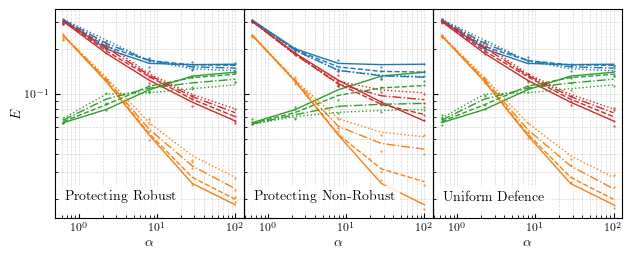

In [19]:
IMG_DIRECTORY = "./Assets/defence_sweep_fgm"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# width = 2.5 * 458.63788
multiplier = 1.25
width = multiplier * 1.5 * 234.8775

plt.style.use("latex_ready.mplstyle")

tuple_size = set_size(width, fraction=1.0, subplots=(1, 2))
tuple_size = (3*8.5/4,2.4)

multiplier = 1.25
second_multiplier = 0.6


# import Line2D for custom legend


fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    sharex=True,
    sharey=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.08)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.99)
fig.subplots_adjust(right=0.97)

print("Figure size in inches: ", fig.get_size_inches())

axes = axes.flatten()

# Create a custom legend
custom_legend = []


for dm_idx, data_model_name in enumerate(data_models):

    axs = axes[dm_idx]
    
    linestyles = ["solid", "dashed", "dashdot", "dotted", (0, (5, 10))]
    
    for idx, epsilon in enumerate(epsilons):

        df_filtered = df.filter(pl.col("data_model_name") == data_model_name, pl.col("epsilon") == epsilon)
        df_filtered = df_filtered.sort(by="alpha")        
        adversarial_error = df_filtered["adversarial_generalization_errors"]
        generalization_error = df_filtered["generalization_error"]
        fair_error = df_filtered["fair_error"]
        boundary_error = df_filtered["boundary_errors"]

        adversarial_error_erm = df_filtered["adversarial_generalization_errors_erm"]
        generalization_error_erm = df_filtered["generalization_error_erm"]
        fair_error_erm = df_filtered["fair_adversarial_errors"] 
        boundary_error_erm = df_filtered["boundary_errors_erm"]

        adversarial_error_erm_std = df_filtered["adversarial_generalization_errors_std_erm"]
        generalization_error_erm_std = df_filtered["generalization_error_erm_std"]
        fair_error_erm_std = df_filtered["fair_adversarial_errors_std"]
        boundary_error_erm_std = df_filtered["boundary_errors_std_erm"]

        if dm_idx == 0:

            custom_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{adv}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{gen}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C2", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{bound}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C3", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{CP}}}}, \varepsilon_t={}$".format(epsilon)))
        

        adversarial_lines = axs.plot(alphas, adversarial_error, linestyle=linestyles[idx],color="C0")
        axs.plot(alphas, generalization_error, linestyle=linestyles[idx],color="C1")
        axs.plot(alphas, boundary_error,linestyle=linestyles[idx], color="C2")
        axs.plot(alphas, fair_error, linestyle=linestyles[idx], color="C3")

        axs.errorbar(
            alphas,
            adversarial_error_erm,
            yerr=adversarial_error_erm_std,
            fmt=".",
            markersize=1,
            color="C0"
        )
        axs.errorbar(
            alphas,
            generalization_error_erm,
            yerr=generalization_error_erm_std,
            fmt=".",
            markersize=1,
            color="C1"
        )
        axs.errorbar(
            alphas,
            boundary_error_erm,
            yerr=boundary_error_erm_std,
            fmt=".",
            markersize=1,
            color="C2"
        )
        axs.errorbar(
            alphas,
            fair_error_erm,
            yerr=fair_error_erm_std,
            fmt=".",
            markersize=1,
            color="C3"
        )


    axs.set_xscale("log")
    axs.set_yscale("log")


    if dm_idx == 0:
        axs.set_ylabel(r"$E$", labelpad=2.0)
    # axs.set_ylabel(r"$E$", labelpad=2.0)


    axs.set_xlabel(r"$\alpha$", labelpad=2.0)
    axs.grid(which="both", axis="both", alpha=0.5)
    axs.legend(title=map_data_model_name[data_model_name], loc="lower left")
    # Set the major ticks to face inwards
    axs.tick_params(axis='both', which='major', direction='in')

    # Set the minor ticks to face inwards
    axs.tick_params(axis='both', which='minor', direction='in')


error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = []

for idx in range(3):
    pass
    # custom_legend.append(error_legend[idx])
    # custom_legend.append(epsilon_legend[idx])

custom_legend.append(error_legend[-1])

# Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=4)

save = True
if save:
    save_plot(
        fig,
        "defence_sweep",
    )

plt.show()

Figure size in inches:  [0.6375 1.2   ]


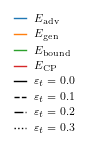

In [20]:
# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 0.1*tuple_size[0], 0.5*tuple_size[1]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

# display figure size
print("Figure size in inches: ", figlegend.get_size_inches())

error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 


# merge the two legends by concatenating the lists
custom_legend = error_legend + epsilon_legend


figlegend.legend(
    handles=custom_legend,
    handlelength=1,
    loc="center",
    ncol=1,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "vertical_legend.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()